## Import & Install PySpark

In [ ]:
!pip install pyspark

     |████████████████████████████████| 212.3MB 66kB/s 
     |████████████████████████████████| 204kB 20.3MB/s 
  Created wheel for pyspark: filename=pyspark-3.1.1-py2.py3-none-any.whl size=212767604 sha256=5299b72e4fc3c3488d547f0acdb75b6ddd8d24d0424b934edfea32ec77952246
  Stored in directory: /root/.cache/pip/wheels/0b/90/c0/01de724414ef122bd05f056541fb6a0ecf47c7ca655f8b3c0f
Successfully built pyspark


In [ ]:
import pyspark
from pyspark.sql import SparkSession
sc = pyspark.SparkContext('local[*]')

### pyspark.sql.SparkSession Main entry point for DataFrame and SQL functionality.
#### The entry point to programming Spark with the Dataset and DataFrame API.

A SparkSession can be used create DataFrame, register DataFrame as tables, execute SQL over tables, cache tables, and read parquet files. To create a SparkSession, use the following builder pattern:
[Source](http://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark.sql.SparkSession)

In [ ]:
spark = SparkSession.builder.master("local").appName("cs5590").config("spark.some.config.option", "some-value").getOrCreate()

In [ ]:
dfEnergy = spark.read.options(header='True', inferSchema='True', delimiter=',') \
  .csv("/content/energy_dataset.csv")
dfEnergy.printSchema()
dfEnergy.show()
dfEnergy.count()


root
 |-- time: string (nullable = true)
 |-- generation biomass: double (nullable = true)
 |-- generation fossil brown coal/lignite: double (nullable = true)
 |-- generation fossil coal-derived gas: double (nullable = true)
 |-- generation fossil gas: double (nullable = true)
 |-- generation fossil hard coal: double (nullable = true)
 |-- generation fossil oil: double (nullable = true)
 |-- generation fossil oil shale: double (nullable = true)
 |-- generation fossil peat: double (nullable = true)
 |-- generation geothermal: double (nullable = true)
 |-- generation hydro pumped storage aggregated: string (nullable = true)
 |-- generation hydro pumped storage consumption: double (nullable = true)
 |-- generation hydro run-of-river and poundage: double (nullable = true)
 |-- generation hydro water reservoir: double (nullable = true)
 |-- generation marine: double (nullable = true)
 |-- generation nuclear: double (nullable = true)
 |-- generation other: double (nullable = true)
 |-- gener

35064

In [ ]:
dfWeather = spark.read.options(header='True', inferSchema='True', delimiter=',') \
  .csv("/content/weather_features.csv")
dfWeather.printSchema()
dfWeather.show()
dfWeather.count()


IndentationError: ignored

In [ ]:
city = dfWeather.select('city_name')

city.printSchema()
city.count()

city.groupBy("city_name").count().show()

root
 |-- city_name: string (nullable = true)

+----------+-----+
| city_name|count|
+----------+-----+
|    Madrid|36267|
|   Seville|35557|
| Barcelona|35476|
|    Bilbao|35951|
|  Valencia|35145|
+----------+-----+



In [ ]:
dfCombind = dfWeather.withColumnRenamed("dt_iso","time")


df_inner = dfCombind.join(dfEnergy, on=['time'], how='inner')

df_inner.printSchema()

root
 |-- time: string (nullable = true)
 |-- city_name: string (nullable = true)
 |-- temp: double (nullable = true)
 |-- temp_min: double (nullable = true)
 |-- temp_max: double (nullable = true)
 |-- pressure: integer (nullable = true)
 |-- humidity: integer (nullable = true)
 |-- wind_speed: integer (nullable = true)
 |-- wind_deg: integer (nullable = true)
 |-- rain_1h: double (nullable = true)
 |-- rain_3h: double (nullable = true)
 |-- snow_3h: double (nullable = true)
 |-- clouds_all: integer (nullable = true)
 |-- weather_id: integer (nullable = true)
 |-- weather_main: string (nullable = true)
 |-- weather_description: string (nullable = true)
 |-- weather_icon: string (nullable = true)
 |-- generation biomass: double (nullable = true)
 |-- generation fossil brown coal/lignite: double (nullable = true)
 |-- generation fossil coal-derived gas: double (nullable = true)
 |-- generation fossil gas: double (nullable = true)
 |-- generation fossil hard coal: double (nullable = true

In [ ]:
df_inner.groupBy('city_name','weather_description').agg({'price actual':'avg'}).show()

+----------+--------------------+------------------+
| city_name| weather_description| avg(price actual)|
+----------+--------------------+------------------+
|    Madrid|                 fog| 64.63083333333329|
| Barcelona|               sleet|              43.1|
|    Bilbao|  ragged shower rain|             68.61|
|  Valencia|         shower rain| 65.85096774193549|
|    Bilbao|light intensity s...| 56.01136612021853|
| Barcelona|       moderate rain| 54.80279513888889|
|    Madrid|light intensity d...|61.037499999999994|
|   Seville|thunderstorm with...| 56.83849999999999|
|    Bilbao|    rain and drizzle| 63.41888888888889|
|  Valencia|     very heavy rain|61.393333333333324|
|    Bilbao|thunderstorm with...| 53.95653846153846|
|   Seville|                haze|  53.4861494252874|
|    Madrid| light rain and snow| 59.86750000000001|
| Barcelona|heavy intensity d...|49.732499999999995|
|  Valencia|       broken clouds| 59.01105187835418|
|    Madrid|             drizzle|58.0580519480

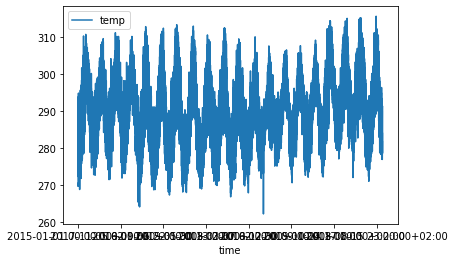

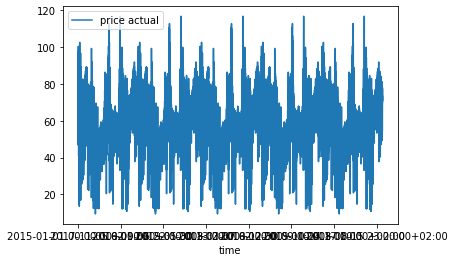

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df_plot = df_inner.toPandas()

df_plot.plot(x="time", y=["temp"])
plt.show()

df_plot.plot(x="time", y=["price actual"])
plt.show()